# Baseline Model Exploration

*by Grace*

Hello Team,

In this notebook, I've embarked on an initial exploration of various baseline models for our binary classification task. The primary goal was to establish a foundational understanding of the performance we can expect from some common algorithms, without any extensive tuning or optimisation.

## Models Explored:
- **Linear Regression**: Used as a binary classifier with a threshold.
- **Logistic Regression**: A standard approach for binary classification tasks.
- **Dummy Classifier**: Provides predictions based on simple rules, serving as a basic baseline.
- **Decision Tree Classifier**: A simple and interpretable model.
- **Random Forest Classifier**: An ensemble method using multiple decision trees.
- **Support Vector Machine (SVM)**: Explored with a linear kernel.

## Next Steps:
- These models can serve as a starting point. There's ample room for optimisation, including hyperparameter tuning, feature engineering, and exploring more complex models.
- It would be beneficial to delve deeper into each model's performance metrics, especially if our dataset has class imbalances.
- Feedback and collaboration are encouraged. If anyone has insights or suggestions on improving these baseline models or wants to introduce other potential models, please share!

Let's collaborate and refine our approach to achieve the best model performance!

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv('../data/df_final_AKI.csv')

## EDA
- discover imbalance trend

In [25]:
df.columns

Index(['Unnamed: 0', 'subject_id', 'dod', 'gender', 'age', 'Albumin',
       'Creatinine', 'INR(PT)', 'PT', 'Sodium', 'Urea Nitrogen',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic',
       'Heart Rate', 'Respiratory Rate', 'hypertension',
       'chronic_kidney_disease', 'sepsis', 'Intercept'],
      dtype='object')

In [26]:
df.describe()

,Unnamed: 0,subject_id,dod,gender,age,Albumin,Creatinine,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
count,9809.000000,9.809000e+03,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.000000,9809.0
mean,4904.000000,1.502895e+07,0.169130,0.595066,66.248649,3.457131,1.785574,1.459035,16.053879,138.392497,31.338974,57.022123,115.462942,85.214905,19.725762,0.532266,0.370068,0.113365,1.0
std,2831.758729,2.905536e+06,0.374886,0.490904,15.492567,0.718880,1.776733,0.762548,8.201325,4.954862,23.540739,10.252333,17.183543,18.487896,6.036613,0.498983,0.482847,0.317055,0.0
min,0.000000,1.000201e+07,0.000000,0.000000,18.000000,0.900000,0.000000,0.500000,7.500000,103.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2452.000000,1.251029e+07,0.000000,0.000000,57.000000,3.000000,0.900000,1.100000,12.200000,136.000000,16.000000,55.000000,112.000000,72.000000,16.000000,0.000000,0.000000,0.000000,1.0
50%,4904.000000,1.507661e+07,0.000000,1.000000,68.000000,3.500000,1.200000,1.200000,13.600000,139.000000,24.000000,56.000000,114.000000,84.000000,19.000000,1.000000,0.000000,0.000000,1.0
75%,7356.000000,1.757821e+07,0.000000,1.000000,78.000000,4.000000,1.900000,1.500000,16.300000,141.000000,39.000000,57.000000,117.000000,96.000000,23.000000,1.000000,1.000000,0.000000,1.0
max,9808.000000,1.999983e+07,1.000000,1.000000,91.000000,5.400000,21.400000,13.600000,150.000000,175.000000,221.000000,328.000000,332.000000,169.000000,69.000000,1.000000,1.000000,1.000000,1.0


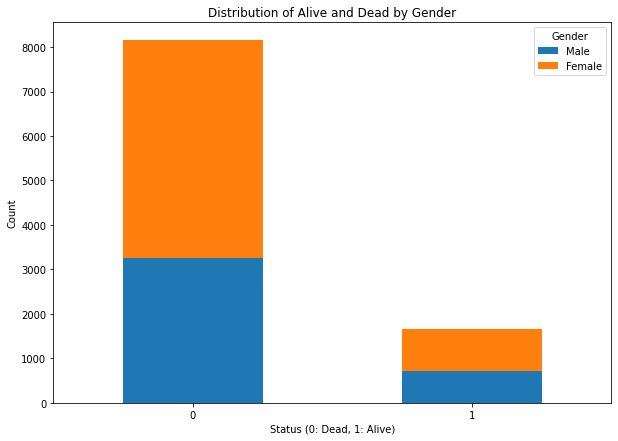

1659 (16.91%) people deceased, 8150 (83.09%) people survived.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of 'dod' and 'gender'
ct = pd.crosstab(df['dod'], df['gender'])

# Plot the crosstab as a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Customize the plot
plt.title('Distribution of Alive and Dead by Gender')
plt.xlabel('Status (0: Dead, 1: Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])  # Adjust labels if needed

# Display the plot
plt.show()

deceased_count = len(df[df["dod"] == 1])
survived_count = len(df[df["dod"] == 0])
deceased_percentage = round(deceased_count / len(df) * 100, 2)
survived_percentage = 100 - deceased_percentage

print(f'{deceased_count} ({deceased_percentage}%) people deceased, {survived_count} ({survived_percentage}%) people survived.')


In [28]:
X = df.drop(columns=['dod', 'Unnamed: 0', 'subject_id'])
y = df['dod']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression:


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# Convert predictions to binary using 0.5 as threshold
y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]

# Evaluate
print("Linear Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bin))
print("Classification Report:\n", classification_report(y_test, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bin))


Linear Regression Evaluation:
Accuracy: 0.8353720693170235
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91      1617
           1       0.87      0.08      0.14       345

    accuracy                           0.84      1962
   macro avg       0.85      0.54      0.52      1962
weighted avg       0.84      0.84      0.77      1962

Confusion Matrix:
 [[1613    4]
 [ 319   26]]


# 2. Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression(max_iter=10000)  # max_iter increased to ensure convergence
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



Logistic Regression Evaluation:
Accuracy: 0.8373078961314255
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91      1556
           1       0.64      0.17      0.26       331

    accuracy                           0.84      1887
   macro avg       0.74      0.57      0.59      1887
weighted avg       0.81      0.84      0.80      1887

Confusion Matrix:
 [[1525   31]
 [ 276   55]]


# 3. Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Classifier Evaluation:
Accuracy: 0.7657657657657657
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      1556
           1       0.36      0.42      0.39       331

    accuracy                           0.77      1887
   macro avg       0.61      0.63      0.62      1887
weighted avg       0.78      0.77      0.77      1887

Confusion Matrix:
 [[1306  250]
 [ 192  139]]


# 4. Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest Classifier Evaluation:
Accuracy: 0.8468468468468469
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      1556
           1       0.67      0.25      0.36       331

    accuracy                           0.85      1887
   macro avg       0.76      0.61      0.64      1887
weighted avg       0.83      0.85      0.82      1887

Confusion Matrix:
 [[1515   41]
 [ 248   83]]


# 5. SVM Classifier

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classifier Evaluation:
Accuracy: 0.8245892951775304
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90      1556
           1       0.00      0.00      0.00       331

    accuracy                           0.82      1887
   macro avg       0.41      0.50      0.45      1887
weighted avg       0.68      0.82      0.75      1887

Confusion Matrix:
 [[1556    0]
 [ 331    0]]


/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/graceliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 6. Deep Learning Approach: NN - MLP (unfinished)

### Imbalance data handling
- SMOTE
- ADASYN

In [13]:
df.head()

,Unnamed: 0,subject_id,dod,gender,age,Albumin,Creatinine,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
0,0,16610592,0,0,64,3.4,0.8,1.0,16.5,138.0,11.0,61.0,131.0,103.0,7.0,0,0,0,1
1,1,10464516,0,1,67,4.6,0.8,1.3,13.9,150.0,17.0,69.0,98.0,73.0,30.0,1,0,0,1
2,2,14644195,0,1,38,2.8,0.7,1.4,14.1,136.0,8.0,56.0,115.0,98.0,18.0,1,0,1,1
3,3,16049569,0,0,52,2.5,0.3,1.1,13.5,139.0,7.0,75.0,110.0,108.0,18.0,0,0,0,1
4,4,17223646,0,0,69,2.8,0.5,1.0,11.3,138.0,9.0,57.0,125.0,109.0,17.0,1,0,0,1


In [14]:
X = df.drop(columns=['dod', 'Unnamed: 0', 'subject_id'])
y = df['dod']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Apply SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)


### Apply ADASYN

In [16]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)


### Apply MLP

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import torchvision.transforms as transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt
import numpy as np

import copy
import random
import time

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import pandas as pd
import json

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

: 

In [ ]:
# 3. Predict on the new test data
# Model
optimized_model = Sequential()

optimized_model.add(Dense(128, input_shape=(5000,), activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(Dropout(0.3))

optimized_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(Dropout(0.3))

optimized_model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
optimized_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

optimized_model.summary()
class_weights = {0: 1., 1: 2.}
optimized_model.fit(X_train, Y_train, epochs=10, verbose=2, validation_split=0.1, batch_size=32,class_weight=class_weights)
#optimized_model.evaluate(X_test, Y_test)
optimized_model.evaluate(X_resampled_adasyn, y_resampled_adasyn) # use whole data set to train, no train test split

y_pred = optimized_model.predict(X_pred)
y_class_pred = (y_pred > 0.367).astype(int)
list(y_class_pred).count(1)

##